In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
g=lambda x:np.exp(-x**2/2)
x=np.linspace(0,1.5,100)
gx=g(x)

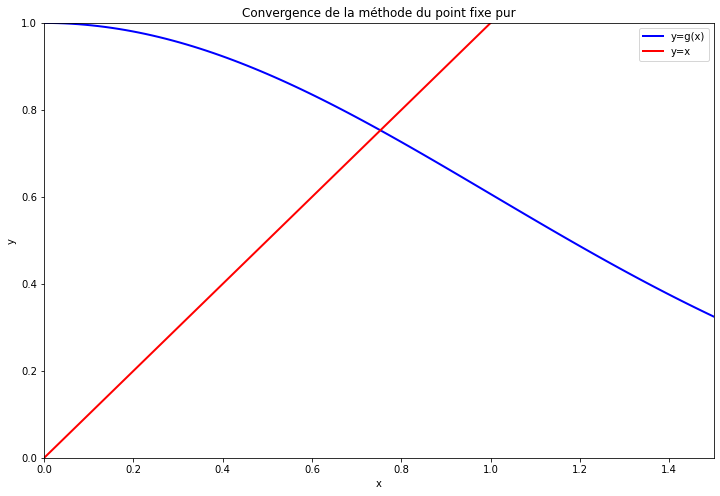

In [3]:
# create a figure and axes
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(1,1,1)   
# set up the subplots as needed
ax1.set_xlim(( 0, 1.5))            
ax1.set_ylim((0, 1))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
#fixed
line1, = ax1.plot(x, gx, 'b', lw=2)
line2, = ax1.plot(x, x, 'r', lw=2)
constructionLines, = ax1.plot([],[] , 'g', lw=2)
pt1, = ax1.plot([],[], 'yo', ms=10)
# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('Convergence de la méthode du point fixe pur')
ax1.legend(['y=g(x)','y=x']);

In [4]:
#Le model pt fixe
def point_fixe(g, x0):
    x1 = x0
    while True:
        x1 = g(x1)
        yield x1
        if x1==g(x1):
            break


In [5]:
xn=point_fixe(g,2)
xn_ptfixe=[]
try :
    for i in range(100):
        alpha=next(xn)
        xn_ptfixe.append(alpha)
        #print("{}  {}".format(i,alpha))
except:
    pass
def shuffle(d):
    dd=[]
    for i,j in zip(d,d):
        dd.append(i)
        dd.append(j)
    return dd
yl=xl=shuffle(xn_ptfixe)
yl=yl[1:]
xl=xl[:-1]

In [6]:
# animation function. This is called sequentially
def drawframe_ptfixePure(n):
    if n%2==0:
        pt1.set_data(xn_ptfixe[:n//2],xn_ptfixe[:n//2])
    constructionLines.set_data(xl[:n-1],yl[:n-1])
    txt_title = ax1.set_title('Méthode du point fixe: frame {}'.format(n))
    return (line1,line2)

In [7]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe_ptfixePure, frames=30, interval=1000, blit=True)

In [8]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [9]:
#anim.save("/home/zouhair/Desktop/animation.mp4")

Remarque pour construire les lignes de constructions utilise l'opérateur shuffle $$x\pm y$$